[[-1.0737421e+08  2.4499998e+00]
 [-5.7039260e-37  3.5461504e+00]
 [ 4.1723254e-08  2.8625000e+00]
 [-5.7039260e-37  3.5656817e+00]]


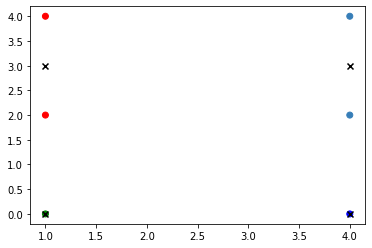

In [24]:
import numpy as np
import matplotlib.pyplot as plt
color_list = np.array(['red','green','blue','#377eb8','#ff7f00','yellow'])

X = np.array([[1,2], [1,4], [1,0], [4,2], [4,4], [4,0]])

class K_Means():
    def __init__(self, dataset, n_clusters = 3):
        self.dataset = dataset
        self.n_clusters = n_clusters
        self.max_n_iter = 100
        
        self.tolerance = .01
        self.fitted = False
        self.labels = np.array([])
        self.centroids = np.empty([self.n_clusters,2], dtype='f'); #
        print(self.centroids)
    
    # 1-й пункт
    def random_centroids(self):
        self.centroids = np.empty([self.n_clusters,2], dtype='f')
        min_x = self.dataset[0][0]
        max_x = self.dataset[0][0]
        min_y = self.dataset[0][1]
        max_y = self.dataset[0][1]
        
        for m in self.dataset:
            if min_x > m[0]: min_x = m[0]
            elif max_x < m[0]: max_x = m[0]
            elif min_y > m[1]: min_y = m[1]
            elif max_y < m[1]: max_y = m[1]
        
        for i in range(self.n_clusters):
            self.centroids[i][0] = np.random.uniform(min_x, max_x)
            self.centroids[i][1] = np.random.uniform(min_y, max_y)
    
    # 2-й пункт
    def predict(self, list):
        clusters_index = np.empty(len(list), dtype = 'i')
        for j in range(len(list)):
            index = 0
            min_dist = 10000000.0 
            for i in range(self.n_clusters):
                dist = np.sqrt(sum((k-l)**2 for k,l in zip(list[j], self.centroids[i])))
                if dist < min_dist: 
                    min_dist = dist
                    index = i
            clusters_index[j] = index
        return clusters_index
      
    
    # 3-й пункт
    
    def distribute_data(self):
        self.labels = np.array([])
        for elem in self.dataset:
            dist = [self.get_dist(elem,center) for center in self.centroids]
            self.labels = np.append(self.labels, [dist.index(min(dist))]).astype(int)
    
    def get_dist(self, list1, list2):  
        return np.sqrt(sum((i-j)**2 for i,j in zip(list1,list2)))
    
    def get_dist_chebishev(self, list1, list2):  
        return max(np.abs(i-j) for i,j in zip(list1,list2))
    
    def get_dist_manhattan(self, list1, list2):  
        return sum(np.abs(i-j) for i,j in zip(list1,list2))
    
    def get_dist_sqr_evklid(self, list1, list2):   
        return sum((i-j)**2 for i,j in zip(list1,list2))
    
    def fit(self):
        iter = 1
        while iter<self.max_n_iter:
            prev_centroids = np.copy(self.centroids)
            self.distribute_data()
            self.recalculate_centroids()
            if max([self.get_dist(i,j) for i,j in zip(self.centroids,prev_centroids)]) < self.tolerance:
                break
            iter += 1
        self.fitted = True
    
    def recalculate_centroids(self):
        for i in range(self.n_clusters):
            num = 0
            temp = np.zeros(self.dataset[0].shape)
            for k,label in enumerate(self.labels):
                if label==i:
                    temp += self.dataset[k]
                    num += 1
            self.centroids[i] = temp/num 
        
points = K_Means(X, 4)

points.random_centroids()
#print(points.centroids)

points.distribute_data()
#print(points.labels)

test.recalculate_centroids()
#print(points.centroids)

points.fit()
#print(points.labels)


#print(points.predict([[0,0], [3,4], [5,8], [7,3]]))

plt.figure()
plt.scatter(X[:,0], X[:,1], c = color_list[points.labels])
plt.scatter(points.centroids[:,0], points.centroids[:,1], c = 'black', marker = 'x')
plt.show()